<a href="https://colab.research.google.com/github/Thikshaya555/machinelearning/blob/master/imageaugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#image augmentation
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32

BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

In [ ]:
y_train=np_utils.to_categorical(y_train,NB_CLASSES)
y_test=np_utils.to_categorical(y_test,NB_CLASSES)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))

In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=10,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
score=model.evaluate(x_test,y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print("test score:",score[0])
print("test accuracy",score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.7212 - accuracy: 0.3899 - val_loss: 1.4259 - val_accuracy: 0.4934
Epoch 2/10
40000/40000 [==============================] - 60s 2ms/step - loss: 1.3397 - accuracy: 0.5242 - val_loss: 1.3003 - val_accuracy: 0.5386
Epoch 3/10
40000/40000 [==============================] - 60s 2ms/step - loss: 1.2051 - accuracy: 0.5751 - val_loss: 1.1818 - val_accuracy: 0.5894
Epoch 4/10
40000/40000 [==============================] - 60s 2ms/step - loss: 1.1022 - accuracy: 0.6134 - val_loss: 1.1472 - val_accuracy: 0.5928
Epoch 5/10
40000/40000 [==============================] - 60s 2ms/step - loss: 1.0193 - accuracy: 0.6415 - val_loss: 1.0906 - val_accuracy: 0.6204
Epoch 6/10
40000/40000 [==============================] - 60s 2ms/step - loss: 0.9488 - accuracy: 0.6677 - val_loss: 1.0601 - val_accuracy: 0.6372
Epoch 7/10
40000/40000 [==============================] - 60s 2ms/st

In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('thiks.jpg')

Saving thiks.jpg to thiks.jpg


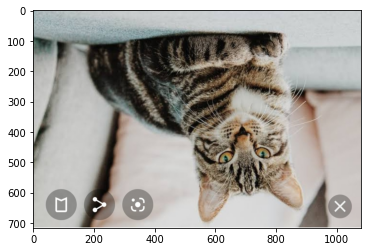

In [ ]:
img=plt.imshow(my_image)


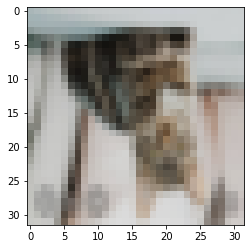

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))


probabilities

array([[3.0358981e-03, 3.9146698e-07, 2.1898350e-01, 1.9692554e-01,
        1.7730194e-01, 2.0716000e-01, 5.5161908e-02, 1.4138705e-01,
        6.2572326e-06, 3.7605532e-05]], dtype=float32)

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('most likely class',number_to_class[index[9]],'--probability:',probabilities[0,index[9]])

most likely class bird --probability: 0.2189835


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(rotation_range=90)

In [ ]:
datagen.fit(x_train)

In [ ]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size=800),steps_per_epoch=x_train.shape[0]//200,epochs=5,validation_data=(x_test,y_test)
)

Epoch 1/5
250/250 [==============================] - 263s 1s/step - loss: 1.5041 - accuracy: 0.4733 - val_loss: 1.1051 - val_accuracy: 0.6135
Epoch 2/5
250/250 [==============================] - 263s 1s/step - loss: 1.3765 - accuracy: 0.5168 - val_loss: 1.1272 - val_accuracy: 0.6060
Epoch 3/5
250/250 [==============================] - 269s 1s/step - loss: 1.3185 - accuracy: 0.5371 - val_loss: 1.0241 - val_accuracy: 0.6423
Epoch 4/5
250/250 [==============================] - 265s 1s/step - loss: 1.2767 - accuracy: 0.5505 - val_loss: 1.0455 - val_accuracy: 0.6355
Epoch 5/5
250/250 [==============================] - 264s 1s/step - loss: 1.2434 - accuracy: 0.5624 - val_loss: 1.0512 - val_accuracy: 0.6335


In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('thiks.jpg')

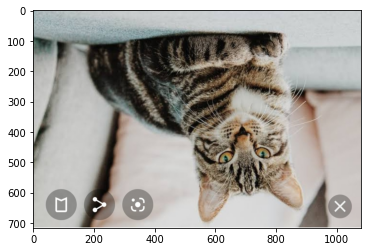

In [ ]:
img=plt.imshow(my_image)

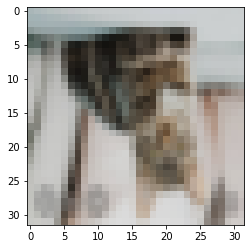

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
tta_steps=10
import numpy as np
predictions=[]
for i in range(tta_steps):
  preds=model.predict_generator(datagen.flow(np.array([my_image_resized,]),batch_size=10,shuffle=False),steps=5)
  predictions.append(preds)
pred=np.mean(predictions,axis=0)


In [ ]:
pip install tqdm

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(pred[0,:])
print('most likely class',number_to_class[index[9]])

most likely class cat


In [ ]:
#dont run this
tta_steps=10
predictions=[]
for i in tqdm(range(tta_steps)):
  preds=model.predict_generator()

NameError: ignored

In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('dogtest.jpg')

Saving dogtest.jpg to dogtest.jpg


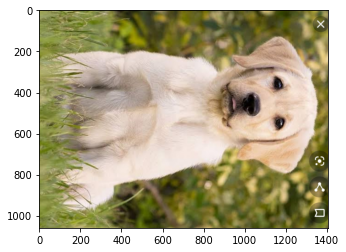

In [ ]:
img=plt.imshow(my_image)

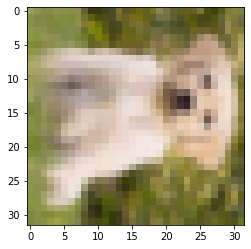

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
tta_steps=10
import numpy as np
predictions=[]
for i in range(tta_steps):
  preds=model.predict_generator(datagen.flow(np.array([my_image_resized,]),batch_size=10,shuffle=False),steps=5)
  predictions.append(preds)
pred=np.mean(predictions,axis=0)


In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(pred[0,:])
print('most likely class',number_to_class[index[9]],'--probability:')

most likely class dog --probability:
